In [1]:
!pip install matplotlib
!pip install pandas
!pip numpy

ERROR: unknown command "numpy"


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# Cargue los datos desde la url dada en un dataframe llamado df_students e imprima una muestra de 5 registros
url = 'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv'
'''
hint: use pandas
delimitador: ","
encabezado: 'infer'
'''

df_students = pd.read_csv(url)
print(df_students)

         Name  StudyHours  Grade
0         Dan       10.00   50.0
1       Joann       11.50   50.0
2       Pedro        9.00   47.0
3       Rosie       16.00   97.0
4       Ethan        9.25   49.0
5       Vicky        1.00    3.0
6    Frederic       11.50   53.0
7      Jimmie        9.00   42.0
8      Rhonda        8.50   26.0
9    Giovanni       14.50   74.0
10  Francesca       15.50   82.0
11      Rajab       13.75   62.0
12    Naiyana        9.00   37.0
13       Kian        8.00   15.0
14      Jenny       15.50   70.0
15     Jakeem        8.00   27.0
16     Helena        9.00   36.0
17      Ismat        6.00   35.0
18      Anila       10.00   48.0
19       Skye       12.00   52.0
20     Daniel       12.50   63.0
21      Aisha       12.00   64.0
22       Bill        8.00    NaN
23        Ted         NaN    NaN


In [4]:
# Remueva cualquier fila con datos faltantes
print(df_students.isnull().sum())

df_students = df_students.dropna()
print(df_students.isnull().sum())

Name          0
StudyHours    1
Grade         2
dtype: int64
Name          0
StudyHours    0
Grade         0
dtype: int64


In [5]:
# Muestre en un nuevo dataframe el promedio total y promedio de horas de estudio por estudiante
'''
hint: use groupby
'''
promedio_alumnos = df_students.groupby('Name')['StudyHours'].mean().reset_index()
promedio_alumnos['MeanStudyHours'] = df_students['StudyHours'].mean()
print(promedio_alumnos)

         Name  StudyHours  MeanStudyHours
0       Aisha       12.00       10.522727
1       Anila       10.00       10.522727
2         Dan       10.00       10.522727
3      Daniel       12.50       10.522727
4       Ethan        9.25       10.522727
5   Francesca       15.50       10.522727
6    Frederic       11.50       10.522727
7    Giovanni       14.50       10.522727
8      Helena        9.00       10.522727
9       Ismat        6.00       10.522727
10     Jakeem        8.00       10.522727
11      Jenny       15.50       10.522727
12     Jimmie        9.00       10.522727
13      Joann       11.50       10.522727
14       Kian        8.00       10.522727
15    Naiyana        9.00       10.522727
16      Pedro        9.00       10.522727
17      Rajab       13.75       10.522727
18     Rhonda        8.50       10.522727
19      Rosie       16.00       10.522727
20       Skye       12.00       10.522727
21      Vicky        1.00       10.522727


In [6]:
# Asigne el pase o no a los estudiantes (pase >= 70) e imprima el resultado

alumnos_pase = df_students
alumnos_pase['Approval'] = np.where(alumnos_pase['Grade'] >= 70, True, False)
print(alumnos_pase)

         Name  StudyHours  Grade  Approval
0         Dan       10.00   50.0     False
1       Joann       11.50   50.0     False
2       Pedro        9.00   47.0     False
3       Rosie       16.00   97.0      True
4       Ethan        9.25   49.0     False
5       Vicky        1.00    3.0     False
6    Frederic       11.50   53.0     False
7      Jimmie        9.00   42.0     False
8      Rhonda        8.50   26.0     False
9    Giovanni       14.50   74.0      True
10  Francesca       15.50   82.0      True
11      Rajab       13.75   62.0     False
12    Naiyana        9.00   37.0     False
13       Kian        8.00   15.0     False
14      Jenny       15.50   70.0      True
15     Jakeem        8.00   27.0     False
16     Helena        9.00   36.0     False
17      Ismat        6.00   35.0     False
18      Anila       10.00   48.0     False
19       Skye       12.00   52.0     False
20     Daniel       12.50   63.0     False
21      Aisha       12.00   64.0     False


In [22]:
# Defina una funcion que calcule el mínimo, máximo, promedio, mediana y moda dada una serie de datos. Pruebe con la serie "Grade"
# del objeto df_students.

'''
Hint:
def funcion(data):
    ...
    return [minimo, maximo, mean, mediana, moda]

estadisticas = funcion(data)
print(estadisticas)
'''

def funcion(data):
    minimo = min(data)
    maximo = max(data)
    mean = np.mean(data)
    mediana = np.median(data)
    vals, counts = np.unique(data,return_counts = True)
    mode = int(vals[counts == np.max(counts)])

    return [minimo, maximo, mean, mediana, mode]

statistics = funcion(df_students['Grade'])
print(statistics)

[3.0, 97.0, 49.18181818181818, 49.5, 50]


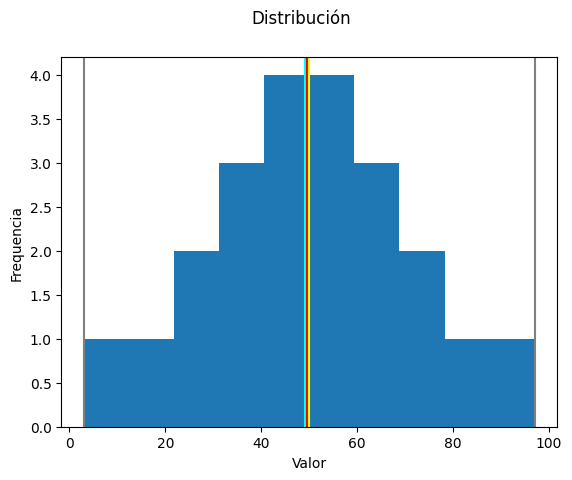

In [19]:
# Defina una funcion que genere un gráfico, un histograma dada una serie de datos, adicional que añada lineas en color
# para las diferentes estadisticas obtenidas en el paso anterior. Use la serie "Grade" del objeto df_students

'''
Hint:
def histograma(data):

    *use .hist para histograma y .axvline para lineas
    *colores: minimo y maximo: 'gray', mean:'cyan', mediana:'red', moda:'yellow'

    plt.hist(...)
    plt.axvline(...)
        ...

    plt.ylabel('Frequencia')
    plt.xlabel('Valor')
    plt.suptitle('Distribución')
    plt.show()

histograma(data)
'''

def histograma(data):

    values = funcion(data)

    plt.hist(data)
    plt.axvline(values[0], color='gray')
    plt.axvline(values[1], color='gray')
    plt.axvline(values[2], color='cyan')
    plt.axvline(values[3], color='red')
    plt.axvline(values[4], color='yellow')

    plt.ylabel('Frequencia')
    plt.xlabel('Valor')
    plt.suptitle('Distribución')
    plt.show()

histograma(df_students['Grade'])

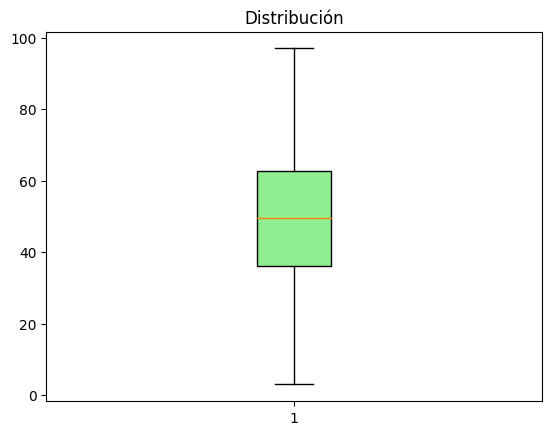

In [20]:
# Defina una funcion que generé un gráfico tipo caja(boxplot) usando la serie 'Grade' y de su interpretación

def boxplot(data):

    plt.boxplot(data, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
    plt.title('Distribución')

    plt.show()

boxplot(df_students['Grade'])

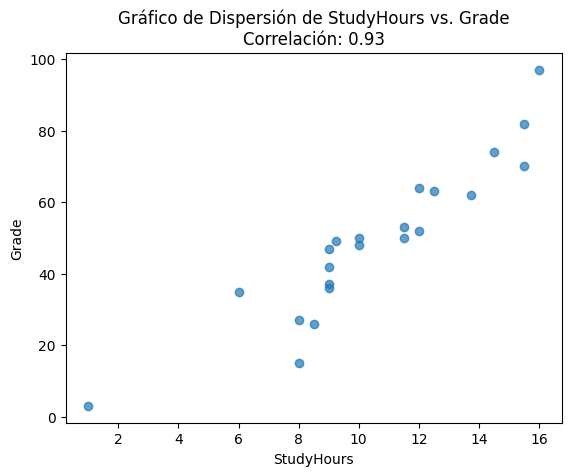

In [21]:
# Calcule la correlación entre "studyhours" y "grade". De su interpretación del resultado, si es positiva o negativa.
def get_correlation(data1, data2):
    correlacion = data1.corr(data2)

    plt.scatter(data1, data2, alpha=0.7)

    plt.title(f'Gráfico de Dispersión de StudyHours vs. Grade\nCorrelación: {correlacion:.2f}')
    plt.xlabel('StudyHours')
    plt.ylabel('Grade')

    plt.show()

get_correlation(df_students['StudyHours'], df_students['Grade'])